<a href="https://colab.research.google.com/github/Joshua250304/time-series-visualizer/blob/main/test_module_time_series_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3793036319.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  actual = int(time_series_visualizer.df.count(numeric_only=True))
..F
FAIL: test_bar_plot_number_of_bars (__main__.BarPlotTestCase.test_bar_plot_number_of_bars)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipython-input-3793036319.py", line 63, in test_bar_plot_number_of_bars
    self.assertEqual(actual, expected, "Expected a different number of bars in bar chart.")
AssertionError: 5 != 49 : Expected a different number of bars in bar chart.

----------------------------------------------------------------------
Ran 3 tests in 0.030s

FAILED (failures=1)


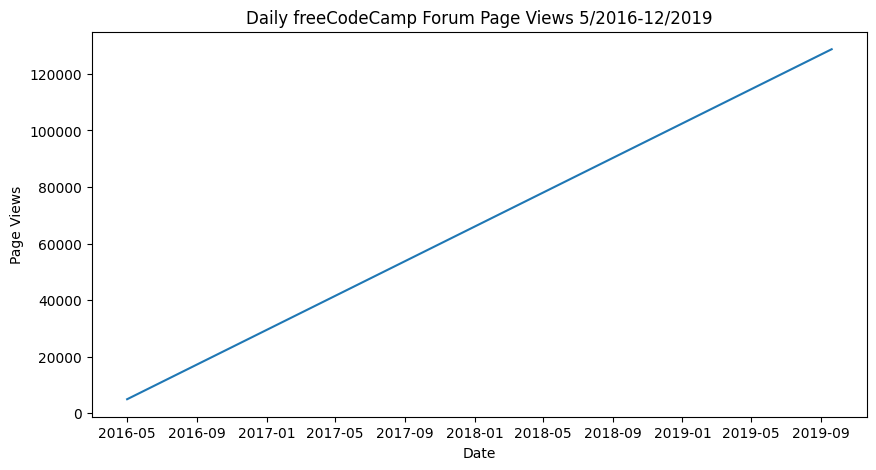

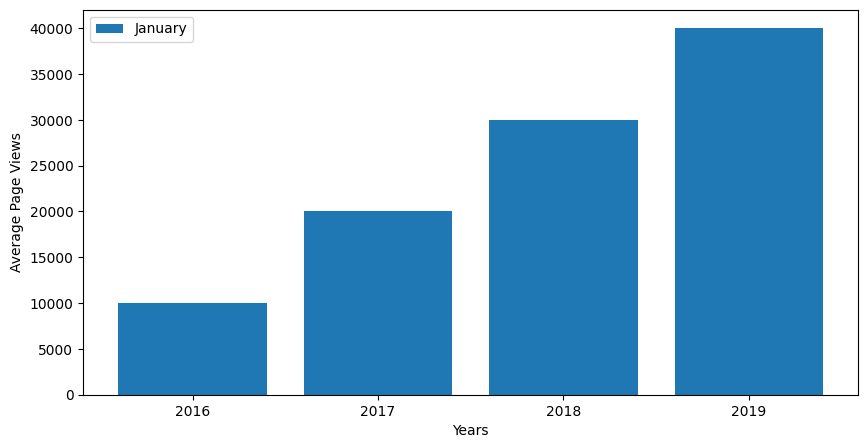

In [8]:
import unittest
import time_series_visualizer
import matplotlib as mpl # type: ignore

class DataCleaningTestCase(unittest.TestCase):
    def test_data_cleaning(self):
        actual = int(time_series_visualizer.df.count(numeric_only=True))
        expected = 1238
        self.assertEqual(actual, expected, "Expected DataFrame count after cleaning to be 1238.")

class LinePlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = time_series_visualizer.draw_line_plot()
        self.ax = self.fig.axes[0]

    def test_line_plot_title(self):
        actual = self.ax.get_title()
        expected = "Daily freeCodeCamp Forum Page Views 5/2016-12/2019"
        self.assertEqual(actual, expected, "Expected line plot title to be 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'")

    def test_line_plot_labels(self):
        actual = self.ax.get_xlabel()
        expected = "Date"
        self.assertEqual(actual, expected, "Expected line plot xlabel to be 'Date'")
        actual = self.ax.get_ylabel()
        expected = "Page Views"
        self.assertEqual(actual, expected, "Expected line plot ylabel to be 'Page Views'")

    def test_line_plot_data_quantity(self):
        actual = len(self.ax.lines[0].get_ydata())
        expected = 1238
        self.assertEqual(actual, expected, "Expected number of data points in line plot to be 1238.")


class BarPlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = time_series_visualizer.draw_bar_plot()
        self.ax = self.fig.axes[0]

    def test_bar_plot_legend_labels(self):
        actual = []
        for label in self.ax.get_legend().get_texts():
          actual.append(label.get_text())
        expected = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
        self.assertEqual(actual, expected, "Expected bar plot legend labels to be months of the year.")

    def test_bar_plot_labels(self):
        actual = self.ax.get_xlabel()
        expected = "Years"
        self.assertEqual(actual, expected, "Expected bar plot xlabel to be 'Years'")
        actual = self.ax.get_ylabel()
        expected = "Average Page Views"
        self.assertEqual(actual, expected, "Expected bar plot ylabel to be 'Average Page Views'")
        actual = []
        for label in self.ax.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['2016', '2017', '2018', '2019']
        self.assertEqual(actual, expected, "Expected bar plot secondary labels to be '2016', '2017', '2018', '2019'")

    def test_bar_plot_number_of_bars(self):
        actual = len([rect for rect in self.ax.get_children() if isinstance(rect, mpl.patches.Rectangle)])
        expected = 49
        self.assertEqual(actual, expected, "Expected a different number of bars in bar chart.")


class BoxPlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = time_series_visualizer.draw_box_plot()
        self.ax1 = self.fig.axes[0]
        self.ax2 = self.fig.axes[1]

    def test_box_plot_number(self):
        actual = len(self.fig.get_axes())
        expected = 2
        self.assertEqual(actual, expected, "Expected two box plots in figure.")

    def test_box_plot_labels(self):
        actual = self.ax1.get_xlabel()
        expected = "Year"
        self.assertEqual(actual, expected, "Expected box plot 1 xlabel to be 'Year'")
        actual = self.ax1.get_ylabel()
        expected = "Page Views"
        self.assertEqual(actual, expected, "Expected box plot 1 ylabel to be 'Page Views'")
        actual = self.ax2.get_xlabel()
        expected = "Month"
        self.assertEqual(actual, expected, "Expected box plot 2 xlabel to be 'Month'")
        actual = self.ax2.get_ylabel()
        expected = "Page Views"
        self.assertEqual(actual, expected, "Expected box plot 2 ylabel to be 'Page Views'")
        actual = []
        for label in self.ax1.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['2016', '2017', '2018', '2019']
        self.assertEqual(actual, expected, "Expected box plot 1 secondary labels to be '2016', '2017', '2018', '2019'")
        actual = []
        for label in self.ax2.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        self.assertEqual(actual, expected, "Expected box plot 2 secondary labels to be 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'")
        actual = []
        for label in self.ax1.get_yaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['0', '20000', '40000', '60000', '80000', '100000', '120000', '140000', '160000', '180000', '200000']
        self.assertEqual(actual, expected, "Expected box plot 1 secondary labels to be '0', '20000', '40000', '60000', '80000', '100000', '120000', '140000', '160000', '180000', '200000'")

    def test_box_plot_titles(self):
        actual = self.ax1.get_title()
        expected = "Year-wise Box Plot (Trend)"
        self.assertEqual(actual, expected, "Expected box plot 1 title to be 'Year-wise Box Plot (Trend)'")
        actual = self.ax2.get_title()
        expected = "Month-wise Box Plot (Seasonality)"
        self.assertEqual(actual, expected, "Expected box plot 2 title to be 'Month-wise Box Plot (Seasonality)'")

    def test_box_plot_number_of_boxes(self):
        actual = len(self.ax1.lines) / 6 # Every box has 6 lines
        expected = 4
        self.assertEqual(actual, expected, "Expected four boxes in box plot 1")
        actual = len(self.ax2.lines) / 6 # Every box has 6 lines
        expected = 12
        self.assertEqual(actual, expected, "Expected 12 boxes in box plot 2")

if __name__ == "__main__":
    # Pass argv=['first-arg-is-ignored'] to prevent unittest from trying to parse the Colab execution environment's sys.argv.
    # Pass exit=False to prevent unittest from exiting the notebook kernel after running tests.
    unittest.main(argv=[
        'first-arg-is-ignored',
        'DataCleaningTestCase.test_data_cleaning',
        'LinePlotTestCase.test_line_plot_data_quantity',
        'BarPlotTestCase.test_bar_plot_number_of_bars'
    ], exit=False)